In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
penguins_data = pd.read_csv('Assignment 8.csv')
penguins_data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Gentoo,Biscoe,44.16,18.51,191.1,4346.0,Male
1,Adelie,Biscoe,46.43,16.24,186.4,3835.0,Female
2,Gentoo,Biscoe,42.64,16.51,193.3,4101.0,Male
3,Gentoo,Dream,46.09,16.85,177.2,4010.0,Female
4,Adelie,Biscoe,42.64,16.29,195.1,4156.0,Female


In [3]:
penguins_data.info()

penguins_data.species.value_counts()

penguins_data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     344 non-null    float64
 3   bill_depth_mm      344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

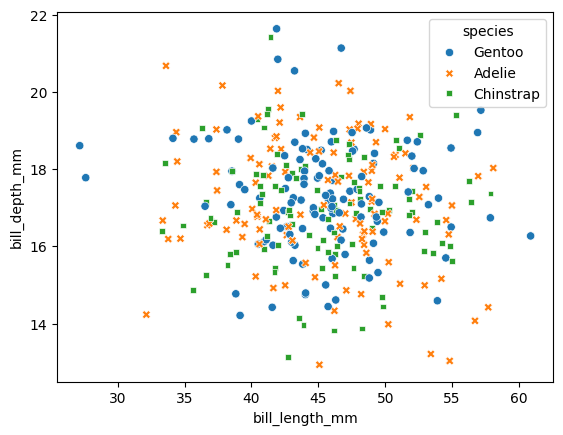

In [4]:

for column_name in penguins_data.select_dtypes(include='float', exclude='object'):
    penguins_data[column_name] = penguins_data[column_name].fillna(penguins_data[column_name].mean())

penguins_data['sex'] = penguins_data['sex'].ffill()

sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', hue='species', data=penguins_data, style='species')
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in ['sex', 'island']:
    penguins_data[col] = label_encoder.fit_transform(penguins_data[col])

# Standardize numerical columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
for col in ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']:
    penguins_data[col] = scaler.fit_transform(penguins_data[[col]])


In [5]:
from sklearn.decomposition import PCA

X = penguins_data.drop('species',axis=1)
Y = penguins_data['species']

PCA_TR = PCA(n_components=3)
X_train = PCA_TR.fit_transform(X)
PCA_TR.explained_variance_ratio_

PCA_TR.components_

pd.DataFrame(PCA_TR.components_,columns=X.columns,index = ['PC-1','PC-2','PC-3'])

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
PC-1,0.123680,-0.544849,0.645211,0.239448,0.462289,-0.022329
PC-2,-0.272308,0.157916,0.003364,0.922179,-0.224137,-0.015758
PC-3,-0.198594,0.570654,-0.061486,0.037026,0.793316,0.020320


In [6]:
LRM = LogisticRegression()
DTC = DecisionTreeClassifier()
RFC = RandomForestClassifier()
KNC = KNeighborsClassifier()
NBC = GaussianNB()

SKF = StratifiedKFold(n_splits = 10, shuffle =True, random_state=10)

print(f'LogisticRegression : {round(cross_val_score(LRM,X_train,Y,cv=SKF,scoring="accuracy").mean()*100,2)}%')
print(f'DecisionTreeClassifier : {round(cross_val_score(DTC,X_train,Y,cv=SKF,scoring="accuracy").mean()*100,2)}%')
print(f'RandomForestClassifier : {round(cross_val_score(RFC,X_train,Y,cv=SKF,scoring="accuracy").mean()*100,2)}%')
print(f'KNeighborsClassifier : {round(cross_val_score(KNC,X_train,Y,cv=SKF,scoring="accuracy").mean()*100,2)}%')
print(f'GaussianNB : {round(cross_val_score(NBC,X_train,Y,cv=SKF,scoring="accuracy").mean()*100,2)}%')

LogisticRegression : 33.98%
DecisionTreeClassifier : 35.52%
RandomForestClassifier : 29.93%
KNeighborsClassifier : 32.63%
GaussianNB : 33.17%
